<a href="https://colab.research.google.com/github/Raj-Gopika/ML_Models/blob/main/DTreeonPenguin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classification on penquin dtat set

## importing essential modules

importing packages for data manipulation and visualization

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(
    { "figure.figsize": (6,4) },
    style =  "ticks",
    color_codes = True,
    font_scale = 0.8
)
%config InlineBackend.figure_format = 'retina'

Importing packages to implement ml models and calculation accuracy

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

tree visualisation is better with dtreeviz package so importing dtreeviz package

In [5]:
import sys
if 'google.colab' in sys.modules:
  !pip install -q dtreeviz
import dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.4 MB/s eta 0:00:00


## Use Case: Penguin Dataset rom seaborn

In [46]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Removing categorical values for simplification.
settin x for features and y fro target. filling out the null feature values with mean of the values to avoid missing values



In [47]:
penguins['species'] = penguins['species'].replace(['Adelie', 'Gentoo', 'Chinstrap'], [0, 1, 2])
penguins = penguins.drop(columns = ['island', 'sex'])
x = penguins.drop(columns = 'species')
y = penguins['species']
x = x.fillna(x.mean())

<ipython-input-47-32d2ddf14f3b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [48]:
penguins.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,39.1,18.7,181.0,3750.0
1,0,39.5,17.4,186.0,3800.0
2,0,40.3,18.0,195.0,3250.0
3,0,NaN,NaN,NaN,NaN
4,0,36.7,19.3,193.0,3450.0


Splitting the dataset to train and test

In [49]:
#test_size bydefault is 75-25 if not specified

x_train, x_test, y_train,y_test = train_test_split(x, y, random_state=47 )


In [50]:
x_train.shape, x_test.shape, x.shape

((258, 4), (86, 4), (344, 4))

Fitting the model to the training data

In [51]:
#depth intially set to two so splitting into two branches
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [52]:
balanced_accuracy_score(y_test, dt.predict(x_test))

0.9440971510555443

In [53]:
balanced_accuracy_score(y_train, dt.predict(x_train))

0.9548997526938704

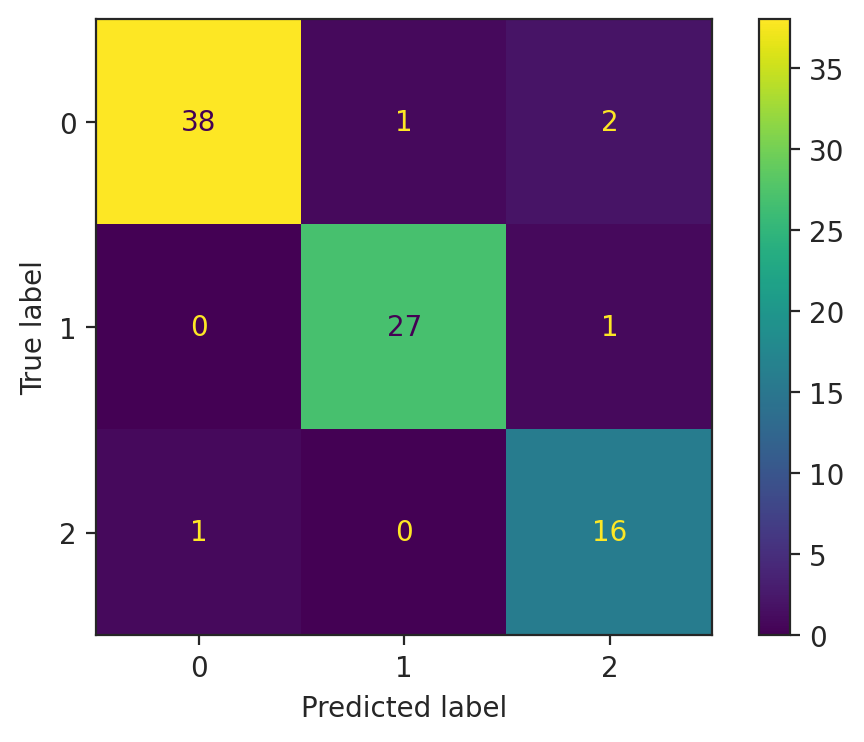

In [54]:
ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_test, dt.predict(x_test))).plot()

In [55]:
print(export_text(dt, feature_names= x.columns, class_names=['Adelie', 'Chinstrap', 'Gentoo']))

|--- flipper_length_mm <= 207.50
|   |--- bill_length_mm <= 43.35
|   |   |--- class: Adelie
|   |--- bill_length_mm >  43.35
|   |   |--- class: Gentoo
|--- flipper_length_mm >  207.50
|   |--- bill_depth_mm <= 18.10
|   |   |--- class: Chinstrap
|   |--- bill_depth_mm >  18.10
|   |   |--- class: Gentoo



In [56]:
penguins['species'].unique()

array([0, 2, 1])

In [57]:
dtviz = dtreeviz.model(dt, x, y, target_name='species', feature_names=x.columns, class_names= ['Adelie', 'Chinstrap', 'Gentoo'])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


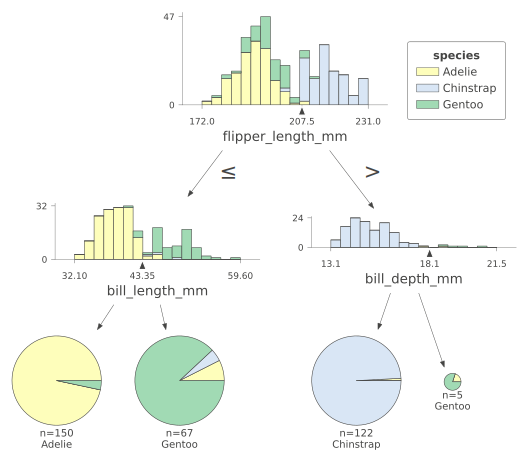

In [58]:
dtviz.view(scale=1.5, fontname='sans-serif')